In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
!ls
# dataset directory
# ./dataset/smart-meters-in-london

Kaggle- Clustering and exploring smart meter data.ipynb
analysis
dataset
energy.csv
example
hc_
hc_0.csv
hc_1.csv
hc_10.csv
hc_100.csv
hc_101.csv
hc_102.csv
hc_103.csv
hc_104.csv
hc_105.csv
hc_106.csv
hc_107.csv
hc_108.csv
hc_109.csv
hc_11.csv
hc_110.csv
hc_111.csv
hc_12.csv
hc_13.csv
hc_14.csv
hc_15.csv
hc_16.csv
hc_17.csv
hc_18.csv
hc_19.csv
hc_2.csv
hc_20.csv
hc_21.csv
hc_22.csv
hc_23.csv
hc_24.csv
hc_25.csv
hc_26.csv
hc_27.csv
hc_28.csv
hc_29.csv
hc_3.csv
hc_30.csv
hc_31.csv
hc_32.csv
hc_33.csv
hc_34.csv
hc_35.csv
hc_36.csv
hc_37.csv
hc_38.csv
hc_39.csv
hc_4.csv
hc_40.csv
hc_41.csv
hc_42.csv
hc_43.csv
hc_44.csv
hc_45.csv
hc_46.csv
hc_47.csv
hc_48.csv
hc_49.csv
hc_5.csv
hc_50.csv
hc_51.csv
hc_52.csv
hc_53.csv
hc_54.csv
hc_55.csv
hc_56.csv
hc_57.csv
hc_58.csv
hc_59.csv
hc_6.csv
hc_60.csv
hc_61.csv
hc_62.csv
hc_63.csv
hc_64.csv
hc_65.csv
hc_66.csv
hc_67.csv
hc_68.csv
hc_69.csv
hc_7.csv
hc_70.csv
hc_71.csv
hc_72.csv
hc_73.csv
hc_74.csv
hc_75.csv
hc_76.csv
hc_77.csv
hc_78.csv
hc_79.csv


In [4]:
b0 = pd.read_csv('./dataset/smart-meters-in-london/daily_dataset/daily_dataset/block_0.csv')

In [5]:
b0

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...
25569,MAC005492,2014-02-24,0.1690,0.175042,0.378,48,0.073174,8.402,0.079
25570,MAC005492,2014-02-25,0.1550,0.160792,0.545,48,0.082118,7.718,0.079
25571,MAC005492,2014-02-26,0.1490,0.178542,0.687,48,0.120820,8.570,0.079
25572,MAC005492,2014-02-27,0.1140,0.146167,0.478,48,0.082616,7.016,0.079


In [6]:
# combining all blocks in dataset/smart-meters-in-london/daily_dataset/daily_dataset
for num in range(0,112):
    df = pd.read_csv('./dataset/smart-meters-in-london/daily_dataset/daily_dataset/block_' + str(num) + '.csv')
    df.reset_index()
    df.to_csv("hc_" + str(num) + ".csv")

fout= open("energy.csv","a")
# first file:
for line in open("hc_0.csv"):
    fout.write(line)
# now the rest:    
for num in range(0,112):
    f = open("hc_"+str(num)+".csv")
    f.readline() # skip the header
    for line in f:
         fout.write(line)
    f.close()
    
fout.close()

In [7]:
energy = pd.read_csv('energy.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
energy

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0.0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0
1,1.0,MAC000002,2012-10-13,0.18,0.230979,0.933,48,0.192329,11.087,0.076
2,2.0,MAC000002,2012-10-14,0.158,0.275479,1.085,48,0.274647,13.223,0.07
3,3.0,MAC000002,2012-10-15,0.131,0.213688,1.164,48,0.224483,10.257,0.07
4,4.0,MAC000002,2012-10-16,0.145,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...,...
7072010,9903.0,MAC004828,2014-02-24,0.0225,0.0538958,0.722,48,0.125341,2.587,0
7072011,9904.0,MAC004828,2014-02-25,0.005,0.015,0.051,48,0.0170294,0.72,0
7072012,9905.0,MAC004828,2014-02-26,0.011,0.0218958,0.152,48,0.0305379,1.051,0
7072013,9906.0,MAC004828,2014-02-27,0.0045,0.0153333,0.092,48,0.0204235,0.736,0


In [9]:
len(energy)

7072015

In [10]:
housecount = energy.groupby('day')[['LCLid']].nunique()

In [11]:
housecount

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41
2011-11-27,41
...,...
2014-02-25,4995
2014-02-26,4993
2014-02-27,4990


In [12]:
# 2011-11-23 ~ 2014-02-28 까지 총 5600여 가구의 데이터를 가지고 있음

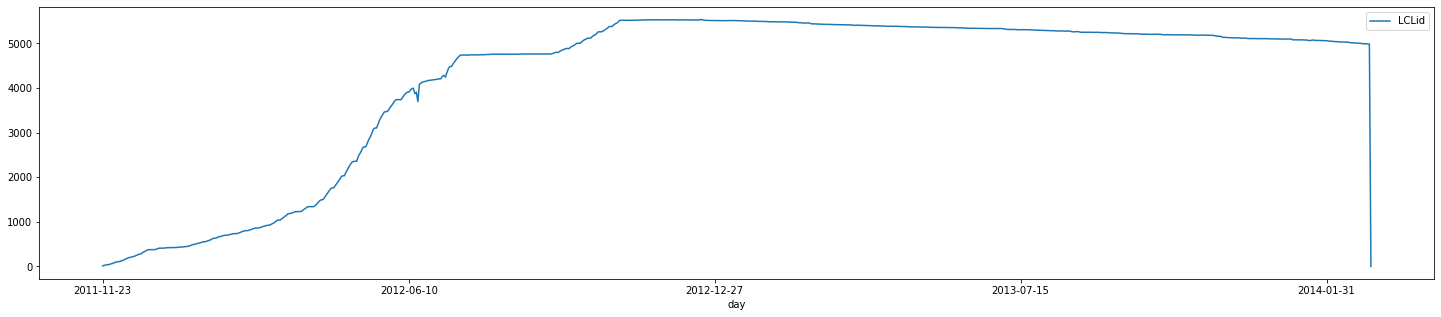

In [13]:
housecount.plot(figsize=(25,5))

In [60]:
energy = energy.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()

In [61]:
energy.count()

day           829
energy_sum    829
LCLid         829
dtype: int64

In [62]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date

In [64]:
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Starting Point of Data at Day Level",min(energy.day))
print("Ending Point of Data at Day Level",max(energy.day))

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [65]:
energy.describe()

,energy_sum,LCLid,avg_energy
count,829.000000,829.000000,829.000000
mean,43535.325676,4234.539204,10.491862
std,20550.594031,1789.994799,1.902513
min,90.385000,13.000000,0.211766
25%,34665.436003,4084.000000,8.676955
50%,46641.160997,5138.000000,10.516983
75%,59755.616996,5369.000000,12.000690
max,84156.135002,5541.000000,15.964434


In [14]:
energy

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0.0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0
1,1.0,MAC000002,2012-10-13,0.18,0.230979,0.933,48,0.192329,11.087,0.076
2,2.0,MAC000002,2012-10-14,0.158,0.275479,1.085,48,0.274647,13.223,0.07
3,3.0,MAC000002,2012-10-15,0.131,0.213688,1.164,48,0.224483,10.257,0.07
4,4.0,MAC000002,2012-10-16,0.145,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...,...
7072010,9903.0,MAC004828,2014-02-24,0.0225,0.0538958,0.722,48,0.125341,2.587,0
7072011,9904.0,MAC004828,2014-02-25,0.005,0.015,0.051,48,0.0170294,0.72,0
7072012,9905.0,MAC004828,2014-02-26,0.011,0.0218958,0.152,48,0.0305379,1.051,0
7072013,9906.0,MAC004828,2014-02-27,0.0045,0.0153333,0.092,48,0.0204235,0.736,0


In [55]:
df_MAC000002 = energy[energy['LCLid'] == 'MAC000002']

In [56]:
df_MAC000002

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0.0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0
1,1.0,MAC000002,2012-10-13,0.18,0.230979,0.933,48,0.192329,11.087,0.076
2,2.0,MAC000002,2012-10-14,0.158,0.275479,1.085,48,0.274647,13.223,0.07
3,3.0,MAC000002,2012-10-15,0.131,0.213688,1.164,48,0.224483,10.257,0.07
4,4.0,MAC000002,2012-10-16,0.145,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...,...
3562082,500.0,MAC000002,2014-02-24,0.1345,0.261,0.891,48,0.205853,12.528,0.075
3562083,501.0,MAC000002,2014-02-25,0.1925,0.246375,0.802,48,0.166291,11.826,0.075
3562084,502.0,MAC000002,2014-02-26,0.1515,0.256833,1.028,48,0.196095,12.328,0.076
3562085,503.0,MAC000002,2014-02-27,0.218,0.427458,1.35,48,0.406681,20.518,0.08


In [33]:
df_MAC000002 = df_MAC000002.loc[:, ['LCLid', 'day', 'energy_median']]

In [34]:
df_MAC000002

,LCLid,day,energy_median
0,MAC000002,2012-10-12,0.1385
1,MAC000002,2012-10-13,0.18
2,MAC000002,2012-10-14,0.158
3,MAC000002,2012-10-15,0.131
4,MAC000002,2012-10-16,0.145
...,...,...,...
3562082,MAC000002,2014-02-24,0.1345
3562083,MAC000002,2014-02-25,0.1925
3562084,MAC000002,2014-02-26,0.1515
3562085,MAC000002,2014-02-27,0.218


In [57]:
df_MAC000002.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2020 entries, 0 to 3562086
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2020 non-null   float64
 1   LCLid          2020 non-null   object 
 2   day            2020 non-null   object 
 3   energy_median  2020 non-null   object 
 4   energy_mean    2020 non-null   object 
 5   energy_max     2020 non-null   object 
 6   energy_count   2020 non-null   object 
 7   energy_std     2012 non-null   object 
 8   energy_sum     2020 non-null   object 
 9   energy_min     2020 non-null   object 
dtypes: float64(1), object(9)
memory usage: 173.6+ KB


In [38]:
# df_MAC000002['energy_median'] = pd.to_numeric(df_MAC000002['energy_median'])

In [39]:
# df_MAC000002.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2020 entries, 0 to 3562086
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LCLid          2020 non-null   object 
 1   day            2020 non-null   object 
 2   energy_median  2020 non-null   float64
dtypes: float64(1), object(2)
memory usage: 63.1+ KB


In [58]:
df_MAC000002

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0.0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0
1,1.0,MAC000002,2012-10-13,0.18,0.230979,0.933,48,0.192329,11.087,0.076
2,2.0,MAC000002,2012-10-14,0.158,0.275479,1.085,48,0.274647,13.223,0.07
3,3.0,MAC000002,2012-10-15,0.131,0.213688,1.164,48,0.224483,10.257,0.07
4,4.0,MAC000002,2012-10-16,0.145,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...,...
3562082,500.0,MAC000002,2014-02-24,0.1345,0.261,0.891,48,0.205853,12.528,0.075
3562083,501.0,MAC000002,2014-02-25,0.1925,0.246375,0.802,48,0.166291,11.826,0.075
3562084,502.0,MAC000002,2014-02-26,0.1515,0.256833,1.028,48,0.196095,12.328,0.076
3562085,503.0,MAC000002,2014-02-27,0.218,0.427458,1.35,48,0.406681,20.518,0.08


In [98]:
MAC000002 = df_MAC000002.loc[:, ['day', 'energy_median']]

In [99]:
MAC000002

,day,energy_median
0,2012-10-12,0.1385
1,2012-10-13,0.18
2,2012-10-14,0.158
3,2012-10-15,0.131
4,2012-10-16,0.145
...,...,...
3562082,2014-02-24,0.1345
3562083,2014-02-25,0.1925
3562084,2014-02-26,0.1515
3562085,2014-02-27,0.218


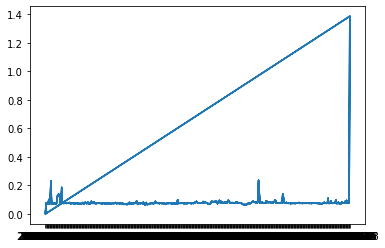

In [77]:
plt.plot(df_MAC000002['day'], df_MAC000002['energy_min'])

In [78]:
MAC000002.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2020 entries, 0 to 3562086
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   day            2020 non-null   object
 1   energy_median  2020 non-null   object
dtypes: object(2)
memory usage: 127.3+ KB


In [83]:
type(MAC000002.day[0])

str

In [103]:
MAC000002 = MAC000002.drop_duplicates('day', keep='first')

In [104]:
MAC000002['day'] = pd.to_datetime(MAC000002['day'])
MAC000002.set_index('day', inplace=True)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
MAC000002

,energy_median
day,
2012-10-12,0.1385
2012-10-13,0.18
2012-10-14,0.158
2012-10-15,0.131
2012-10-16,0.145
...,...
2014-02-24,0.1345
2014-02-25,0.1925
2014-02-26,0.1515


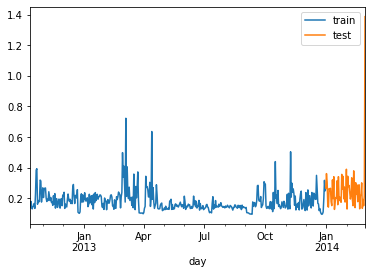

In [110]:
# 2013/12/31 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.
split_date = pd.Timestamp('31-12-2013')


train = MAC000002.loc[:split_date, ['energy_median']]
test = MAC000002.loc[split_date:, ['energy_median']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [111]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[6.85258964e-02],
       [1.34661355e-01],
       [9.96015936e-02],
       [5.65737052e-02],
       [7.88844622e-02],
       [8.36653386e-02],
       [1.12350598e-01],
       [6.13545817e-02],
       [2.15936255e-01],
       [4.61354582e-01],
       [4.74900398e-01],
       [1.05179283e-01],
       [1.44223108e-01],
       [1.28286853e-01],
       [1.48207171e-01],
       [3.56175299e-01],
       [3.46613546e-01],
       [1.27490040e-01],
       [2.10358566e-01],
       [2.75697211e-01],
       [1.74501992e-01],
       [2.62151394e-01],
       [2.72509960e-01],
       [2.74103586e-01],
       [1.70517928e-01],
       [1.33067729e-01],
       [1.56972112e-01],
       [1.44223108e-01],
       [2.35059761e-01],
       [1.92031873e-01],
       [1.42629482e-01],
       [1.74501992e-01],
       [1.23505976e-01],
       [1.25896414e-01],
       [9.32270916e-02],
       [1.93625498e-01],
       [1.05976096e-01],
       [2.15936255e-01],
       [6.45418327e-02],
       [1.63346614e-01],


In [112]:
train_sc_df = pd.DataFrame(train_sc, columns=['energy_median'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['energy_median'], index=test.index)
train_sc_df.head()

,energy_median
day,
2012-10-12,0.068526
2012-10-13,0.134661
2012-10-14,0.099602
2012-10-15,0.056574
2012-10-16,0.078884


In [113]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['energy_median'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['energy_median'].shift(s)

train_sc_df.head(13)

,energy_median,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
day,,,,,,,,,,,,,
2012-10-12,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-13,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-14,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-15,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-16,0.078884,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-17,0.083665,0.078884,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-18,0.112351,0.083665,0.078884,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-19,0.061355,0.112351,0.083665,0.078884,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN
2012-10-20,0.215936,0.061355,0.112351,0.083665,0.078884,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN


In [114]:
X_train = train_sc_df.dropna().drop('energy_median', axis=1)
y_train = train_sc_df.dropna()[['energy_median']]

X_test = test_sc_df.dropna().drop('energy_median', axis=1)
y_test = test_sc_df.dropna()[['energy_median']]


X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
day,,,,,,,,,,,,
2012-10-24,0.105179,0.474900,0.461355,0.215936,0.061355,0.112351,0.083665,0.078884,0.056574,0.099602,0.134661,0.068526
2012-10-25,0.144223,0.105179,0.474900,0.461355,0.215936,0.061355,0.112351,0.083665,0.078884,0.056574,0.099602,0.134661
2012-10-26,0.128287,0.144223,0.105179,0.474900,0.461355,0.215936,0.061355,0.112351,0.083665,0.078884,0.056574,0.099602
2012-10-27,0.148207,0.128287,0.144223,0.105179,0.474900,0.461355,0.215936,0.061355,0.112351,0.083665,0.078884,0.056574
2012-10-28,0.356175,0.148207,0.128287,0.144223,0.105179,0.474900,0.461355,0.215936,0.061355,0.112351,0.083665,0.078884


In [115]:
y_train.head()

,energy_median
day,
2012-10-24,0.144223
2012-10-25,0.128287
2012-10-26,0.148207
2012-10-27,0.356175
2012-10-28,0.346614


In [116]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
#print(X_train)
print(y_train.shape)
#print(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(434, 12)
(434, 1)


In [117]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(434, 12, 1)
[[[0.10517928]
  [0.4749004 ]
  [0.46135458]
  ...
  [0.09960159]
  [0.13466135]
  [0.0685259 ]]

 [[0.14422311]
  [0.10517928]
  [0.4749004 ]
  ...
  [0.05657371]
  [0.09960159]
  [0.13466135]]

 [[0.12828685]
  [0.14422311]
  [0.10517928]
  ...
  [0.07888446]
  [0.05657371]
  [0.09960159]]

 ...

 [[0.16175299]
  [0.0247012 ]
  [0.00398406]
  ...
  [0.11394422]
  [0.25498008]
  [0.40557769]]

 [[0.35378486]
  [0.16175299]
  [0.0247012 ]
  ...
  [0.10836653]
  [0.11394422]
  [0.25498008]]

 [[0.24462151]
  [0.35378486]
  [0.16175299]
  ...
  [0.03904382]
  [0.10836653]
  [0.11394422]]]
[[1.44223108e-01]
 [1.28286853e-01]
 [1.48207171e-01]
 [3.56175299e-01]
 [3.46613546e-01]
 [1.27490040e-01]
 [2.10358566e-01]
 [2.75697211e-01]
 [1.74501992e-01]
 [2.62151394e-01]
 [2.72509960e-01]
 [2.74103586e-01]
 [1.70517928e-01]
 [1.33067729e-01]
 [1.56972112e-01]
 [1.44223108e-01]
 [2.35059761e-01]
 [1.92031873e-01]
 [1.42629482e-01]
 [1.74501992e-01]
 [1.23505976e-01]
 [1.258

In [118]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [119]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
434/434 [==============================] - 0s 809us/step - loss: 0.0211
Epoch 2/100
434/434 [==============================] - 0s 124us/step - loss: 0.0113
Epoch 3/100
434/434 [==============================] - 0s 124us/step - loss: 0.0111
Epoch 4/100
434/434 [==============================] - 0s 118us/step - loss: 0.0109
Epoch 5/100
434/434 [==============================] - 0s 117us/step - loss: 0.0108
Epoch 6/100
434/434 [==============================] - 0s 117us/step - loss: 0.0108
Epoch 7/100
434/434 [==============================] - 0s 117us/step - loss: 0.0108
Epoch 8/100
434/434 [==============================] - 0s 115us/step - loss: 0.0107
Epoch 9/100
434/434 [==============================] - 0s 113us/step - loss: 0.0106
Epoch 10/100
434/434 [==============================] - 0s 111us/step - loss: 0.0106
Epoch 11/100
434/434 [==============================] - 0s 112us/step - loss: 0.0106
Epoch 00011: early stopping


In [120]:
print(X_test_t)

[[[0.16334661]
  [0.35856574]
  [0.09003984]
  [0.1314741 ]
  [0.27091633]
  [0.24780876]
  [0.2685259 ]
  [0.0749004 ]
  [0.08525896]
  [0.33625498]
  [0.42390438]
  [0.27330677]]

 [[0.39203187]
  [0.16334661]
  [0.35856574]
  [0.09003984]
  [0.1314741 ]
  [0.27091633]
  [0.24780876]
  [0.2685259 ]
  [0.0749004 ]
  [0.08525896]
  [0.33625498]
  [0.42390438]]

 [[0.05099602]
  [0.39203187]
  [0.16334661]
  [0.35856574]
  [0.09003984]
  [0.1314741 ]
  [0.27091633]
  [0.24780876]
  [0.2685259 ]
  [0.0749004 ]
  [0.08525896]
  [0.33625498]]

 [[0.12111554]
  [0.05099602]
  [0.39203187]
  [0.16334661]
  [0.35856574]
  [0.09003984]
  [0.1314741 ]
  [0.27091633]
  [0.24780876]
  [0.2685259 ]
  [0.0749004 ]
  [0.08525896]]

 [[0.17450199]
  [0.12111554]
  [0.05099602]
  [0.39203187]
  [0.16334661]
  [0.35856574]
  [0.09003984]
  [0.1314741 ]
  [0.27091633]
  [0.24780876]
  [0.2685259 ]
  [0.0749004 ]]

 [[0.16653386]
  [0.17450199]
  [0.12111554]
  [0.05099602]
  [0.39203187]
  [0.16334661]


In [122]:
score = model.evaluate(X_test_t, y_test, batch_size = 30)
print(score)

48/48 [==============================] - 0s 92us/step
0.0897412970662117


In [126]:
train_sc_df.describe()

,energy_median,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,446.000000,445.000000,444.000000,443.000000,442.000000,441.000000,440.000000,439.000000,438.000000,437.000000,436.000000,435.000000,434.000000
mean,0.135290,0.134980,0.134733,0.134239,0.134176,0.134425,0.134721,0.135028,0.135322,0.135575,0.135749,0.135971,0.136035
std,0.108655,0.108579,0.108577,0.108198,0.108312,0.108309,0.108253,0.108185,0.108133,0.108127,0.108190,0.108215,0.108332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000797,0.000797,0.000797,0.000797,0.000797,0.000797
25%,0.069522,0.069323,0.069124,0.068924,0.068725,0.069323,0.069920,0.070120,0.070120,0.070120,0.070120,0.070120,0.070120
50%,0.105578,0.105179,0.105179,0.105179,0.104382,0.105179,0.105179,0.105179,0.105578,0.105976,0.105976,0.105976,0.105976
75%,0.176295,0.174502,0.174502,0.173307,0.173904,0.174502,0.174502,0.174502,0.174502,0.174502,0.175100,0.175697,0.176295
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
test_sc_df.describe()

,energy_median,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,60.000000,59.000000,58.000000,57.000000,56.000000,55.000000,54.000000,53.000000,52.000000,51.000000,50.000000,49.000000,48.000000
mean,0.252563,0.221960,0.222421,0.224757,0.226010,0.228989,0.227165,0.227483,0.228226,0.231576,0.230056,0.231141,0.233217
std,0.263359,0.115718,0.116674,0.116334,0.116998,0.115913,0.116202,0.117290,0.118309,0.116968,0.117646,0.118612,0.118964
min,0.050996,0.050996,0.050996,0.050996,0.050996,0.050996,0.050996,0.050996,0.050996,0.050996,0.050996,0.050996,0.050996
25%,0.131474,0.131474,0.131474,0.131474,0.131474,0.137052,0.134263,0.131474,0.131474,0.137052,0.134263,0.131474,0.139841
50%,0.198008,0.195219,0.194821,0.200797,0.203984,0.207171,0.203984,0.200797,0.203984,0.207171,0.203984,0.207171,0.207570
75%,0.312550,0.306773,0.307171,0.307570,0.312550,0.317530,0.307171,0.307570,0.312948,0.318327,0.323307,0.329084,0.330876
max,2.058167,0.469323,0.469323,0.469323,0.469323,0.469323,0.469323,0.469323,0.469323,0.469323,0.469323,0.469323,0.469323


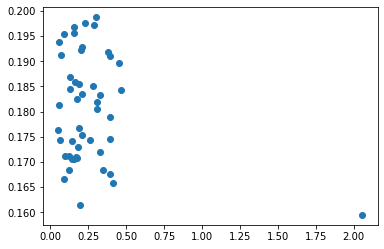

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_t, batch_size=30)
plt.scatter(y_test, y_pred)
# plt.xlabel("Price Index: $Y_i$")
# plt.ylabel("Predicted price Index: $\hat{Y}_i$")
# plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

In [129]:
MAC000002

,energy_median
day,
2012-10-12,0.1385
2012-10-13,0.18
2012-10-14,0.158
2012-10-15,0.131
2012-10-16,0.145
...,...
2014-02-24,0.1345
2014-02-25,0.1925
2014-02-26,0.1515


In [131]:
MAC000002 = MAC000002.drop(MAC000002.index[len(MAC000002)-1])

In [132]:
MAC000002

,energy_median
day,
2012-10-12,0.1385
2012-10-13,0.18
2012-10-14,0.158
2012-10-15,0.131
2012-10-16,0.145
...,...
2014-02-23,0.301
2014-02-24,0.1345
2014-02-25,0.1925


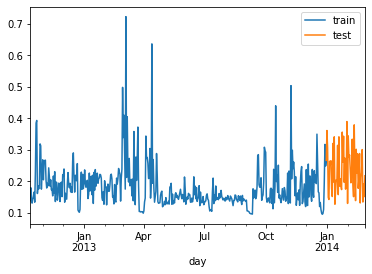

In [133]:
# 2013/12/31 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.
split_date = pd.Timestamp('31-12-2013')


train = MAC000002.loc[:split_date, ['energy_median']]
test = MAC000002.loc[split_date:, ['energy_median']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [134]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[6.85258964e-02],
       [1.34661355e-01],
       [9.96015936e-02],
       [5.65737052e-02],
       [7.88844622e-02],
       [8.36653386e-02],
       [1.12350598e-01],
       [6.13545817e-02],
       [2.15936255e-01],
       [4.61354582e-01],
       [4.74900398e-01],
       [1.05179283e-01],
       [1.44223108e-01],
       [1.28286853e-01],
       [1.48207171e-01],
       [3.56175299e-01],
       [3.46613546e-01],
       [1.27490040e-01],
       [2.10358566e-01],
       [2.75697211e-01],
       [1.74501992e-01],
       [2.62151394e-01],
       [2.72509960e-01],
       [2.74103586e-01],
       [1.70517928e-01],
       [1.33067729e-01],
       [1.56972112e-01],
       [1.44223108e-01],
       [2.35059761e-01],
       [1.92031873e-01],
       [1.42629482e-01],
       [1.74501992e-01],
       [1.23505976e-01],
       [1.25896414e-01],
       [9.32270916e-02],
       [1.93625498e-01],
       [1.05976096e-01],
       [2.15936255e-01],
       [6.45418327e-02],
       [1.63346614e-01],


In [135]:
train_sc_df = pd.DataFrame(train_sc, columns=['energy_median'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['energy_median'], index=test.index)
train_sc_df.head()

,energy_median
day,
2012-10-12,0.068526
2012-10-13,0.134661
2012-10-14,0.099602
2012-10-15,0.056574
2012-10-16,0.078884


In [136]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['energy_median'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['energy_median'].shift(s)

train_sc_df.head(13)

,energy_median,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
day,,,,,,,,,,,,,
2012-10-12,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-13,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-14,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-15,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-16,0.078884,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-17,0.083665,0.078884,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-18,0.112351,0.083665,0.078884,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-19,0.061355,0.112351,0.083665,0.078884,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN,NaN
2012-10-20,0.215936,0.061355,0.112351,0.083665,0.078884,0.056574,0.099602,0.134661,0.068526,NaN,NaN,NaN,NaN


In [137]:
X_train = train_sc_df.dropna().drop('energy_median', axis=1)
y_train = train_sc_df.dropna()[['energy_median']]

X_test = test_sc_df.dropna().drop('energy_median', axis=1)
y_test = test_sc_df.dropna()[['energy_median']]


X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
day,,,,,,,,,,,,
2012-10-24,0.105179,0.474900,0.461355,0.215936,0.061355,0.112351,0.083665,0.078884,0.056574,0.099602,0.134661,0.068526
2012-10-25,0.144223,0.105179,0.474900,0.461355,0.215936,0.061355,0.112351,0.083665,0.078884,0.056574,0.099602,0.134661
2012-10-26,0.128287,0.144223,0.105179,0.474900,0.461355,0.215936,0.061355,0.112351,0.083665,0.078884,0.056574,0.099602
2012-10-27,0.148207,0.128287,0.144223,0.105179,0.474900,0.461355,0.215936,0.061355,0.112351,0.083665,0.078884,0.056574
2012-10-28,0.356175,0.148207,0.128287,0.144223,0.105179,0.474900,0.461355,0.215936,0.061355,0.112351,0.083665,0.078884


In [138]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
#print(X_train)
print(y_train.shape)
#print(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(434, 12)
(434, 1)


In [139]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(434, 12, 1)
[[[0.10517928]
  [0.4749004 ]
  [0.46135458]
  ...
  [0.09960159]
  [0.13466135]
  [0.0685259 ]]

 [[0.14422311]
  [0.10517928]
  [0.4749004 ]
  ...
  [0.05657371]
  [0.09960159]
  [0.13466135]]

 [[0.12828685]
  [0.14422311]
  [0.10517928]
  ...
  [0.07888446]
  [0.05657371]
  [0.09960159]]

 ...

 [[0.16175299]
  [0.0247012 ]
  [0.00398406]
  ...
  [0.11394422]
  [0.25498008]
  [0.40557769]]

 [[0.35378486]
  [0.16175299]
  [0.0247012 ]
  ...
  [0.10836653]
  [0.11394422]
  [0.25498008]]

 [[0.24462151]
  [0.35378486]
  [0.16175299]
  ...
  [0.03904382]
  [0.10836653]
  [0.11394422]]]
[[1.44223108e-01]
 [1.28286853e-01]
 [1.48207171e-01]
 [3.56175299e-01]
 [3.46613546e-01]
 [1.27490040e-01]
 [2.10358566e-01]
 [2.75697211e-01]
 [1.74501992e-01]
 [2.62151394e-01]
 [2.72509960e-01]
 [2.74103586e-01]
 [1.70517928e-01]
 [1.33067729e-01]
 [1.56972112e-01]
 [1.44223108e-01]
 [2.35059761e-01]
 [1.92031873e-01]
 [1.42629482e-01]
 [1.74501992e-01]
 [1.23505976e-01]
 [1.258

In [154]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(1000, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1000)              4008000   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1001      
Total params: 4,009,001
Trainable params: 4,009,001
Non-trainable params: 0
_________________________________________________________________


In [155]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
434/434 [==============================] - 2s 5ms/step - loss: 0.0136
Epoch 2/100
434/434 [==============================] - 2s 4ms/step - loss: 0.0119
Epoch 3/100
434/434 [==============================] - 2s 4ms/step - loss: 0.0102
Epoch 4/100
434/434 [==============================] - 2s 4ms/step - loss: 0.0106
Epoch 00004: early stopping


In [158]:
score = model.evaluate(X_test_t, y_test, batch_size = 300)
print(score)

47/47 [==============================] - 0s 858us/step
0.020612290129065514


Text(0, 0.5, 'Predicted')

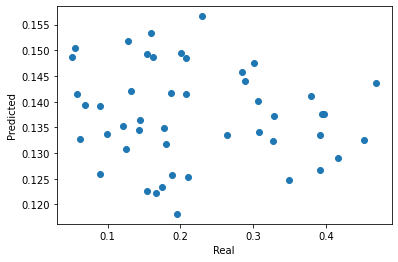

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_t, batch_size=300)
plt.scatter(y_test, y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
# plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")